
# Lab 2: Using PLINK for GWAS and Simulating Phenotypes in R

## introduction

This lab section is dedicated to building off of the previous introduction to PLINK. This lab was built using PLINK documentation that is available for reference [here](https://www.cog-genomics.org/plink/1.9/) and [here](https://zzz.bwh.harvard.edu/plink/index.shtml). By the end of this lab, you should be able to:  

- **Use PLINK to perform QC on your dataset**
- **Run GWAS using PLINK for both discrete and continuous phenotypes**
- **Account for covariates in GWAS run**
- **Visualize GWAS outputs generated by PLINK**
- **Simulate phenotypes in R **

**Go into lab2 directory and check the files inside, you should see**:

In [1]:
cd data/lab2
ls
cd plink
ls

game  lab_2.ipynb  plink
assoc_QC2.assoc  hapmap1_QC1.fam              hapmap1_QC2_miss_stat.lmiss
assoc_QC2.log    hapmap1_QC1.log              hapmap1_QC2_miss_stat.log
badSNPs.txt      hapmap1_QC2.bed              log_assoc_QC2.assoc.logistic
hapmap1.map      hapmap1_QC2.bim              log_assoc_QC2.log
hapmap1.ped      hapmap1_QC2.fam              pop.phe
hapmap1_QC1.bed  hapmap1_QC2.log              qt.phe
hapmap1_QC1.bim  hapmap1_QC2_miss_stat.imiss


# PLINK

## Using PLINK options to perform QC

### Basic QC on hapmap1 dataset



There are a number of options within PLINK to modify your input files for your desired analysis. Four of the most common options for quality control are:

1. Removing individuals with high missingness (*--mind*);
2. Removing SNPs with low MAF (*--maf*);
3. Removing SNPs with high missingness (*--geno*);
4. Removing SNPs that deviate significantly from Hardy-Weinberg Equilibrium (*--hwe*). 

Although you can modify these options however you like, let's apply some "reasonable" cut-offs to the HapMap dataset. **Try the following command to apply our quality control**:

In [5]:
plink --file hapmap1 --make-bed --mind 0.05 --maf 0.01 --geno 0.05 --hwe 0.05 --out hapmap1_QC1

PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to hapmap1_QC1.log.
Options in effect:
  --file hapmap1
  --geno 0.05
  --hwe 0.05
  --maf 0.01
  --make-bed
  --mind 0.05
  --out hapmap1_QC1

1030487 MB RAM detected; reserving 515243 MB for main workspace.
.ped scan complete (for binary autoconversion).324252628293031323334353738394041424344464748495051525355565758596061626465666768697071737475767778798082838485868788899192939495969798100%
Performing single-pass .bed write (83534 variants, 89 people).
--file: hapmap1_QC1-temporary.bed + hapmap1_QC1-temporary.bim +14243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394%
hapmap1_QC1-temporary.fam written.
83534 variants loaded from .bim file.
89 people (89 males, 0 females) loaded from .fam.
89 phenotype values loaded from .fam.
0 people removed due to missing genotype d

*Problem 1*  
What quality control did we apply to the HapMap dataset with the code above?

*Problem 2*  
Use the commands learned in lab 1 to generate statistics on missing data **and** allele frequencies for *hapmap1_QC1*. Compare with the files you generated last time for *hapmap1*. Are the number of individuals the same after our quality control? The number of SNPs?

### User-directed QC

Sometimes rather than setting simple threshold values, the user may want to provide a specific list of SNPs or individuals to use or to exclude. For instance, we only want to keep individuals having signed study consent or we want to exclude SNPs which are labeled as bad SNPs by our collaborators. 

For SNPs, it is possible to exclude SNPs specified in a list (--exclude), or only use those SNPs in the list (--extract). For individuals, it is possible to remove individuals specified in a list (--remove), or only use those individuals in the list (--keep). It is important to note that the file should be a simple text file, with the name of a single SNP on each line. 

In this case, we'll use the `badSNPs.txt` text file, which contains some SNPs we want to exclude from downstream analysis.

**Using a list of questionable SNPs (badSNPS.txt) we can remove them from our dataset**:

In [4]:
plink --file hapmap1 --make-bed --exclude badSNPs.txt --mind 0.05 --maf 0.01 --geno 0.05 --hwe 0.05 --out hapmap1_QC2

PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to hapmap1_QC2.log.
Options in effect:
  --exclude badSNPs.txt
  --file hapmap1
  --geno 0.05
  --hwe 0.05
  --maf 0.01
  --make-bed
  --mind 0.05
  --out hapmap1_QC2

1030487 MB RAM detected; reserving 515243 MB for main workspace.
.ped scan complete (for binary autoconversion).324252628293031323334353738394041424344464748495051525355565758596061626465666768697071737475767778798082838485868788899192939495969798100%
Performing single-pass .bed write (83534 variants, 89 people).
--file: hapmap1_QC2-temporary.bed + hapmap1_QC2-temporary.bim +14243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394%
hapmap1_QC2-temporary.fam written.
83534 variants loaded from .bim file.
89 people (89 males, 0 females) loaded from .fam.
89 phenotype values loaded from .fam.
--exclude: 83531 v

**Generate missingness statistics for this new BED file**:

In [6]:
plink --bfile hapmap1_QC2 --missing --out hapmap1_QC2_miss_stat

PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to hapmap1_QC2_miss_stat.log.
Options in effect:
  --bfile hapmap1_QC2
  --missing
  --out hapmap1_QC2_miss_stat

1030487 MB RAM detected; reserving 515243 MB for main workspace.
62968 variants loaded from .bim file.
89 people (89 males, 0 females) loaded from .fam.
89 phenotype values loaded from .fam.
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 89 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total genotyping rate is 0.996532.
--missing: Sample missing data report written to hapmap1_QC2_miss_stat.imiss,
and variant-based missing data report written to hapmap1_QC2_miss_stat.l

*Problem 3*  
How many SNPs are there in the *hapmap1_QC2_miss_stat.lmiss* file? (**hint: use the "wc" command and remember to subtract one line for the header**)

## Testing associations


<!-- http://www.cs.cmu.edu/~sssykim/teaching/f13/slides/GWAS_casecont.pdf -->
After quality control, most frequently you will run some sort of association test on your dataset. In our HapMap1 dataset, the phenotype embedded in the *hapmap1_QC2* file (let's call it *Disease X*) was actually generated to specifically associate with a particular genetic variant (*rs2222162*) in a probabilistic framework. Let's see if we can find it with a [basic association test](https://zzz.bwh.harvard.edu/plink/anal.shtml) (chi-squared test with 1 df). **Basic association tests can easily be done with the following command**:

In [7]:
plink --bfile hapmap1_QC2 --assoc --out assoc_QC2


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to assoc_QC2.log.
Options in effect:
  --assoc
  --bfile hapmap1_QC2
  --out assoc_QC2

1030487 MB RAM detected; reserving 515243 MB for main workspace.
62968 variants loaded from .bim file.
89 people (89 males, 0 females) loaded from .fam.
89 phenotype values loaded from .fam.
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 89 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total genotyping rate is 0.996532.
62968 variants and 89 people pass filters and QC.
Among remaining phenotypes, 44 are cases and 45 are controls.
Writing C/C --assoc report to assoc_QC2.assoc ... 11121416171820

Now that we have generated our association file *assoc_QC2*, let's use some Unix commands to manipulate this file. **Follow the command below to print the top SNPs (SNPs with high degree of statistical significance) in our new association file**:

In [8]:
sort -k9g assoc_QC2.assoc | head

 CHR         SNP         BP   A1      F_A      F_U   A2        CHISQ            P           OR 
  13   rs9585021      64274    1    0.625   0.2841    2        20.62    5.586e-06          4.2 
   2   rs2222162      10602    1   0.2841   0.6222    2        20.51    5.918e-06       0.2409 
   9  rs10810856      46335    1   0.2955  0.04444    2        20.01    7.723e-06        9.016 
   2   rs4675607      13220    1   0.1628   0.4778    2        19.93     8.05e-06       0.2125 
   2   rs1375352      13219    1   0.1818      0.5    2        19.83    8.485e-06       0.2222 
   2   rs4673349      13218    1   0.1818      0.5    2        19.83    8.485e-06       0.2222 
  21    rs219746      81525    1      0.5   0.1889    2        19.12    1.228e-05        4.294 
   1   rs4078404       6200    2      0.5      0.2    1        17.64    2.667e-05            4 
  14   rs1152431      66892    2   0.2727   0.5795    1        16.94    3.862e-05       0.2721 


This command should print the top 9 SNPs (rank by p-value).

*Problem 4*  
Is the particular genetic variant *rs2222162* among the top 9 SNPs? Does it have the most significant association?

*Problem 5*  
Build off of the last command to write the output into a text file named *top_nine_assoc_QC2.txt*. Provide the code you used to do this.

Other types of association, such as logistic regression, can be done just as easily. **Run an association using logistic regression with the following command**:

In [9]:
plink --bfile hapmap1_QC2 --logistic --out log_assoc_QC2

PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to log_assoc_QC2.log.
Options in effect:
  --bfile hapmap1_QC2
  --logistic
  --out log_assoc_QC2

1030487 MB RAM detected; reserving 515243 MB for main workspace.
62968 variants loaded from .bim file.
89 people (89 males, 0 females) loaded from .fam.
89 phenotype values loaded from .fam.
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 89 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total genotyping rate is 0.996532.
62968 variants and 89 people pass filters and QC.
Among remaining phenotypes, 44 are cases and 45 are controls.
Writing logistic model association results to log_ass

Check the top nine SNPs in *log_assoc_QC2.assoc.logistic* **using the following command**:

In [10]:
# Part 1: obtain rows without NA
# Part 2: sort by p-value (from smallest to largest)
# Part 3: print the first ten lines
grep -v NA log_assoc_QC2.assoc.logistic | sort -k9g | head

 CHR         SNP         BP   A1       TEST    NMISS         OR         STAT            P 
   2   rs2222162      10602    1        ADD       89     0.2221       -3.997    6.417e-05
  13   rs9585021      64274    1        ADD       88      4.114        3.941    8.116e-05
   1   rs4078404       6200    2        ADD       89      4.663        3.865     0.000111
  21    rs219746      81525    1        ADD       89      4.161         3.82    0.0001334
   2   rs1375352      13219    1        ADD       88      0.251       -3.787    0.0001525
   2   rs4673349      13218    1        ADD       88      0.251       -3.787    0.0001525
   2   rs4675607      13220    1        ADD       88     0.2417       -3.779    0.0001572
  14   rs4899962      66836    2        ADD       88      0.241       -3.757    0.0001717
   9  rs10810856      46335    1        ADD       89      8.937        3.716    0.0002021


*Problem 6*  
How do the p-values of the top nine SNPs in *log_assoc_QC2.assoc.logistic* compare to those from *assoc_QC2.assoc*?

# Running a Case-Control GWAS

One of the most common uses of GWAS is to explore putative associations for disease. In this section we will practice our skills with PLINK using a dataset with SNPs in a 20Mb region from a case-control GWAS of a binary phenotype (more than 5000 individuals). The input files have already been copied inside the lab 2 folder. It includes small GWAS file set (bed/bim/fam files), as well as the file containing covariates obtained from principal components analysis (PCA). **Exit the plink directory and go to the game directory.**

In [11]:
cd ..
cd game
ls

five_PCs.txt  GAME_data.bed  GAME_data.bim  GAME_data.fam  QC_GAME_data.log


**Throughout this section, you will be asked to run multiple PLINK commands. You need to provide all bash code you've written as part of the submission. Remember that basic PLINK commands and options are given in lab 1, and the PLINK commands provided above will be a useful reference for writing new commands on your own.**

## Preliminary Quality Control

**Your first task is to use PLINK to remove SNPs with low call rates (>5% missingness), deviation from Hardy-Weinberg equilibrium (p < 0.001), and low minor allele frequency (MAF < 0.05). Part of the script has already been written, you just need to enter the appropriate numbers in the right spots.**

In [12]:
plink --bfile GAME_data --make-bed --maf --geno --hwe --out QC_GAME_data 

PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to QC_GAME_data.log.
Options in effect:
  --bfile GAME_data
  --geno
  --hwe
  --maf
  --make-bed
  --out QC_GAME_data

Error: Missing --hwe parameter.
For more information, try "plink --help <flag name>" or "plink --help | more".


: 5

*Problem 7*  
How many SNPs were removed and how many are left? (*hint: these numbers were printed to screen after running the command*)

## Logistic Regression

**Perform association tests with logistic regression `(--logistic)` on the QC'ed files you just generated. Include the `--adjust` flag to account for multiple testing. No phenotype file needs to be specified because case-control status is in the .fam file.**  

*Problem 8*  
Print out the top nine SNPs in the logistic association results file. What is the most significant SNP? What is its p-value? Make sure you look at the *.assoc.logistic.adjusted* file's Bonferroni-corrected value (BONF) as this gives you the corrected significance. Provide all the code you used.

**The top five genetic principal components (PCs) for our samples are in the five_PCs.txt file. Perform the same association tests, but this time include the top five PCs as covariates (hint: check the `--covar` flag). Include `--hide-covar` in your code to avoid redundant ouput.**

*Problem 9*  
What is the most significant SNP now? What is its p-value? Provide all the code you used.

*Problem 10*  
Are the results the same from Problem 8 and Problem 9? Did correcting for genetic PCs do anything?

# Working in R

## Manhattan plots

Manhattan plots are one of the most common ways of visualizing GWAS results, and are simple scatter plots where the x-axis gives the genomic coordinates and the y-axis gives the negative log of the p-value for an individual SNP. Because of the vast number of the points (SNPs), it kind of resembles the Manhattan skyline, thus the name. Although there are a number of different ways to create a Manhattan plot, today we will just use the plotting packages we have already introduced. There are also other popular packages for making Manhattan plots in R (i.e. [qqman](https://cran.r-project.org/web/packages/qqman/)). 

**Open the lab_2.Rmd file in RStudio, and make sure to change your working directory to the lab2 folder you downloaded. Then try the following command**:

Warning message:
“package ‘ggplot2’ was built under R version 4.3.3”


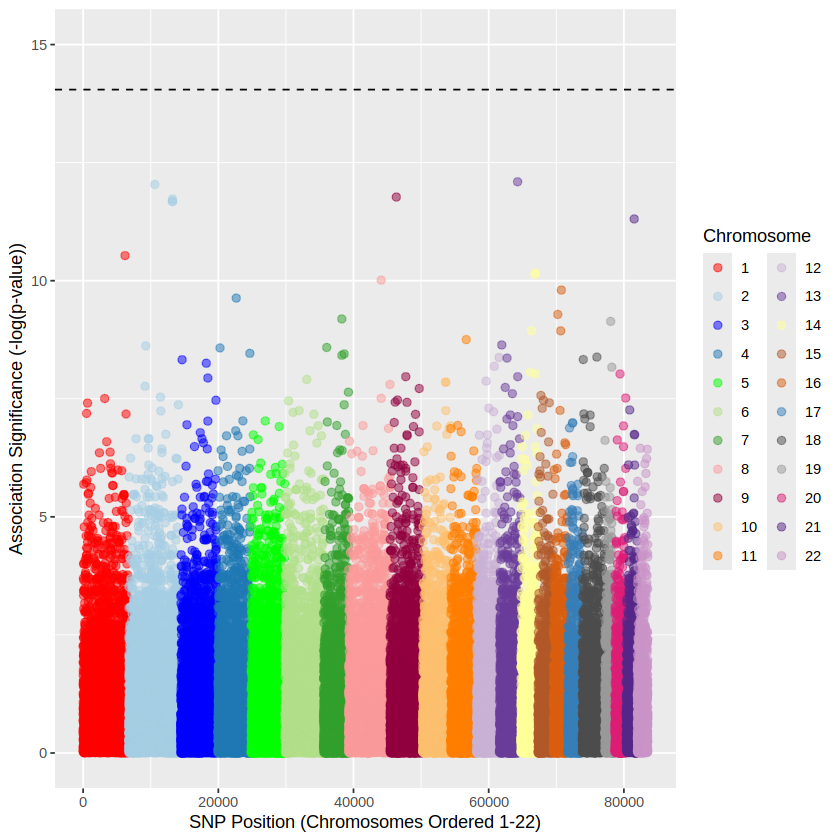

In [13]:
setwd("data/lab2/plink")            ## Change this to your individual download location
library(ggplot2)                 ## Load 

assoc_QC2 <- read.table("./assoc_QC2.assoc", header = TRUE, stringsAsFactors = FALSE)  
assoc_QC2 <- subset(assoc_QC2, P != "NA")                    ## Trim data


# Set a color scheme for the chromosomes with hex codes
our_colors <- c("#FF0000", "#a6cee3","#0000FF","#1f78b4", "#00FF00","#b2df8a","#33a02c","#fb9a99","#91003f","#fdbf6f","#ff7f00","#cab2d6","#6a3d9a","#ffff99","#b15928","#d95f0e","#377eb8","#4d4d4d","#999999","#dd1c77","#542788","#c994c7")

# Set the Bonferroni-corrected threshold
bonferroni <- -log(0.05 / length(assoc_QC2$P))

# Plot the data with all the aesthetic and plotting options
ggplot(assoc_QC2)  + 
  geom_point(aes(x = BP, y = -log(P), color = factor(CHR)), size = 2, alpha = 0.5) + 
  scale_y_continuous(limits = c(0,15)) + 
  geom_hline(yintercept = bonferroni, linetype = 2) + 
  xlab("SNP Position (Chromosomes Ordered 1-22)") + 
  ylab("Association Significance (-log(p-value))") + 
  labs(color = 'Chromosome') +
  scale_colour_manual(values = our_colors)

Here we have produced a Manhattan plot, with colors of the dots (SNPs) indicating the appropriate chromosomes. We have also plotted a dotted line which is a threshold for significance after multiple-testing correction. The multiple-correction procedure we have used here is the **Bonferroni correction**, which is the most conservative in terms of avoiding false positives. That is why none of the SNPs are significant.

*Problem 11*  
Make two Manhattan plots by importing the other two *.assoc.logistic* files that you made in section 3.2 (NOT the adjusted versions) into R and using some of the code above. Keep in mind that the length of the file is different from the previous Manhattan plot, so you may need to change the significance threshold as well as the data used. What are the main differences between the two plots?

## Simulating phenotype data [Continuous phenotypes]

Building off of the genotype simulation that we performed in the previous lab, we will now simulate phenotype data using R. Note that the two simulations are written as functions so that we can easily call them later on with different arguments, which saves us from having to copy and paste the whole chunk of code.
  
First, let's **run our genotype simulation**:

In [14]:
# Setting up the simulate genotype function
simulate_genotype <- function(num_individuals, ploidy_level, maf) {
  geno <- as.matrix(rbinom(num_individuals, ploidy_level, maf))
  return(geno)
}


# Executing the simulate genotype function, assuming 1000 diploid individuals and a minor allele frequency of 0.2
genotype <- simulate_genotype(num_individuals = 1000, ploidy_level = 2, maf = 0.2)

Using the generated genotype data, we will calculate phenotype using the equation:

$$Y = \beta X + \epsilon$$
  
Where   
$Y =$ phenotype  
$\beta =$ effect size of the linear model  
$X =$ genotype  
$\epsilon =$ variance of the noise term  
  
Knowing this, we can **run our phenotype simulation**:

In [15]:
# Setting up the simulate phenotype function
simulate_phenotype <- function(genotype, beta, epsilon) {
  phenotype <- beta * genotype + epsilon
  return(phenotype)
}

# Executing the simulate phenotype function using our genotype data, an effect size (beta) of 1, and an error term (epsilon) ~ N(0,1)
phenotype <- simulate_phenotype(genotype, beta = 1, epsilon = rnorm(nrow(genotype), mean = 0, sd = 1))

Excellent, now we have our phenotypes simulated. Using these two datasets, **let's plot our phenotypes against our genotypes**:

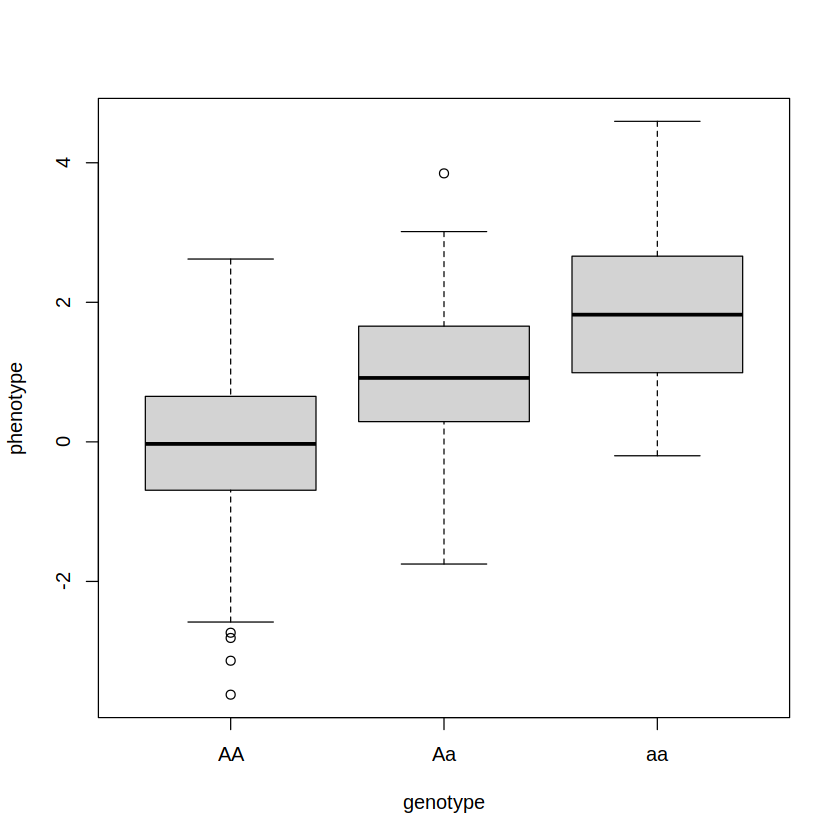

In [16]:
# Making a boxplot, and renaming our X-axis genotype labels to be more intuitive
boxplot(phenotype ~ genotype, xaxt = "n")
axis(1, at = 1:3, labels = c("AA", "Aa", "aa"))

Here are our phenotype ranges for each genotype, nicely illustrated as a box plot. Medians are indicated by the dark horizontal lines within the boxes.

Now **run a linear regression for phenotype on genotype**:

In [17]:
# Running a linear regression and printing a summary of the results
summary(lm(phenotype ~ genotype))


Call:
lm(formula = phenotype ~ genotype)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.5828 -0.6534  0.0084  0.7167  2.9191 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.04048    0.03768  -1.074    0.283    
genotype     0.96951    0.05400  17.955   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9752 on 998 degrees of freedom
Multiple R-squared:  0.2442,	Adjusted R-squared:  0.2434 
F-statistic: 322.4 on 1 and 998 DF,  p-value: < 2.2e-16


In particular, note the results of the genotype coefficient. The estimate is pretty close to our effect size of 1, and the standard error and p-value both look very robust.
  
Earlier I mentioned that we wrote our simulations as functions so we could call them (i.e., easily re-run that code, perhaps with new arguments) at a later point. Now we'll illustrate what happens when changing our sample size. In our simulate_genotype() function, for the num_individuals argument I've replaced the numerical value with asterisks. Please change this part of the code so we have only 100 individuals and **re-run the linear regression for phenotype on genotype**:

In [18]:
# Calling the functions we wrote earlier, remember to replace the *** with the number of individuals or the code won't work
genotype <- simulate_genotype(num_individuals = ***, ploidy_level = 2, maf = 0.2)
phenotype <- simulate_phenotype(genotype, beta = 1, epsilon = rnorm(nrow(genotype), mean = 0, sd = 1))

# Running a linear regression and printing a summary of the results
summary(lm(phenotype ~ genotype))

ERROR: Error in parse(text = x, srcfile = src): <text>:2:49: unexpected '^'
1: # Calling the functions we wrote earlier, remember to replace the *** with the number of individuals or the code won't work
2: genotype <- simulate_genotype(num_individuals = **
                                                   ^


*Problem 12*  
Compare these summary statistics to the previous results. When reducing our sample size from 1000 to 100 subjects, what changes occur to the effect size estimate (of the genotype), and the accompanying standard error and p-value?  Now, change the sample size to 10,000 and rerun the code. Compare 1000 to 10,000 and describe how it affects the effect size estimate, standard error, and p-value?